# SPARC-4 mini-pipeline tools
## Bias and Flat-field calibrations

This notebook shows an example for combining a series of bias and flat exposures into the master calibration product of SPARC4 pipeline.

* Eder Martioli, LNA 14 Feb 2023

In [1]:
import os,sys
path_parent = os.path.dirname(os.getcwd())
# path_parent = "/Volumes/Samsung_T5/sparc4-pipeline/"
sys.path.append(path_parent)
import sparc4_product_plots as s4plt
import sparc4_pipeline_lib as s4pipelib
import sparc4_utils as s4utils
import sparc4_params

### User inputs

In [10]:
# set night directory name
NIGHTDIR = '20221115'
# set SPARC4 channel
CHANNEL = 1  # 1, 2, 3 or 4
# whether or not to force reduction even if product already exists
FORCE = False

### Preparatory procedures
Below are some preparatory procedures for defining data directories and product file names.

In [11]:
# get SPARC4 pipeline parameters
p = sparc4_params.load_sparc4_parameters()
# set raw data root directory (where raw data will be searched)
p['ROOTDATADIR'] = "/Volumes/Samsung_T5/Data/SPARC4/comissioning_nov22/"
# set reduction directory name
p['ROOTREDUCEDIR'] = '/Volumes/Samsung_T5/Data/SPARC4/comissioning_nov22/reduced'
# if reduced dir doesn't exist create one
if not os.path.exists(p['ROOTREDUCEDIR']) :
    os.mkdir(p['ROOTREDUCEDIR'])
    
# identify files for reduction
p = s4utils.identify_files(p, NIGHTDIR, print_report=False)    

# set full paths for a given night and channel
data_dir = p['data_directories'][CHANNEL-1]
ch_reduce_dir = '{}/sparc4acs{}/'.format(p['ROOTREDUCEDIR'],CHANNEL)
reduce_dir = '{}/sparc4acs{}/{}/'.format(p['ROOTREDUCEDIR'],CHANNEL,NIGHTDIR)

# set master bias product file name
p["master_bias"] = "{}/{}_s4c{}_MasterZero.fits".format(reduce_dir,NIGHTDIR,CHANNEL)
# set master flat product file name
p["master_flat"] = "{}/{}_s4c{}_MasterDomeFlat.fits".format(reduce_dir,NIGHTDIR,CHANNEL)

### Run master calibration

In [12]:
# calculate master bias and save product to FITS
p = s4pipelib.run_master_calibration(p, 
                                     inputlist=p['zeros'][CHANNEL-1], 
                                     output=p["master_bias"], 
                                     obstype='bias', 
                                     data_dir=data_dir, 
                                     reduce_dir=reduce_dir, 
                                     force=FORCE)

In [13]:
# calculate master dome flat and save product to FITS
p = s4pipelib.run_master_calibration(p, 
                                     inputlist=p['dflats'][CHANNEL-1], 
                                     output=p["master_flat"], 
                                     obstype='flat', 
                                     data_dir=data_dir, 
                                     reduce_dir=reduce_dir, 
                                     normalize=True, 
                                     force=FORCE)

### Produce plots

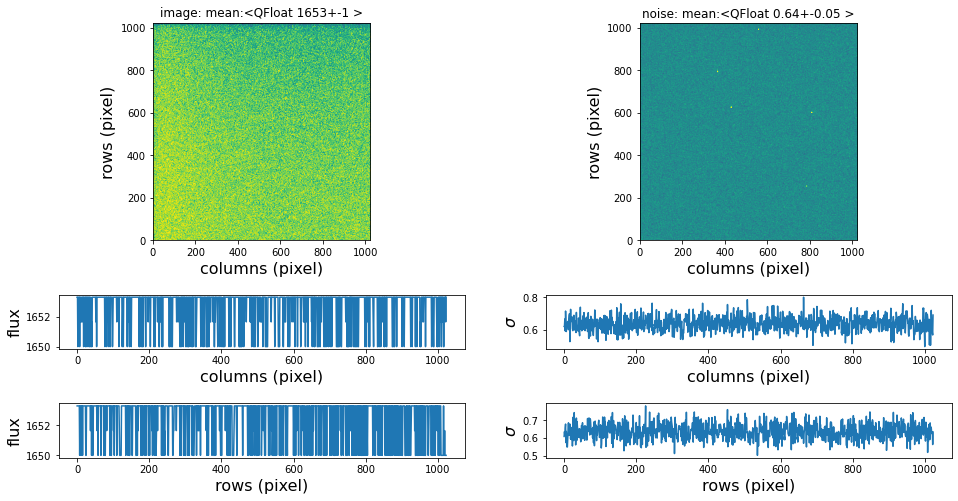

In [14]:
# plot master bias
s4plt.plot_cal_frame(p["master_bias"], percentile=99.5, xcut=512, ycut=512)

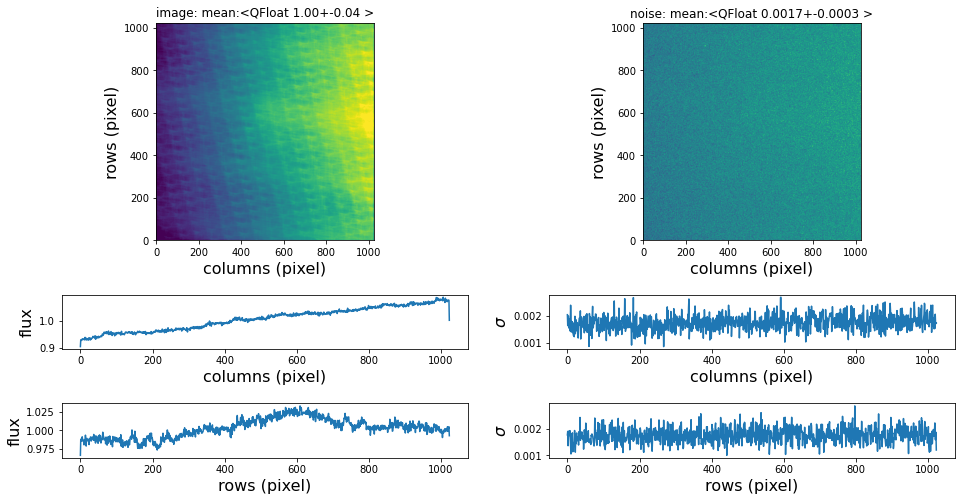

In [15]:
# plot master flat
s4plt.plot_cal_frame(p["master_flat"], percentile=99.5, xcut=512, ycut=512)